In [8]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/dataset/IMDB Dataset/IMDB Dataset.csv')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
dataset.isnull().sum()

,0
review,0
sentiment,0


In [11]:
dataset.duplicated().sum()

418

In [12]:
dataset.drop_duplicates()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


#preprocessing
Begin by preprocessing the dataset, including steps such as text normalization, tokenization, and removing stop words and special characters.

In [13]:
dataset['review'] = dataset['review'].apply(lambda x:x.lower())
dataset.head(5)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [14]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw_list = stopwords.words('english')
print(sw_list)
dataset['review'] = dataset['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))
dataset['review'].head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,review
0,one reviewers mentioned watching 1 oz episode ...
1,wonderful little production. <br /><br />the f...
2,thought wonderful way spend time hot summer we...
3,basically there's family little boy (jake) thi...
4,"petter mattei's ""love time money"" visually stu..."


In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  # Ensure punkt is downloaded
nltk.download('punkt_tab')  # Download punkt_tab if needed

# Tokenizing each review
dataset['tokens'] = dataset['review'].apply(lambda x: word_tokenize(x))
dataset[['review', 'tokens']].head(5)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
dataset.head(5)

In [ ]:
import re

# Function to remove special characters
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)  # Retain only alphabets and spaces

# Apply the function to the 'review' column
dataset['review'] = dataset['review'].apply(remove_special_characters)


In [ ]:
dataset.replace({'sentiment':{
    'positive':1,
    'negative':0
}} ,inplace=True)

In [ ]:
dataset.head(5)

 Design and implement a suitable Natural Language Processing (NLP) architecture, such as recurrent neural networks (RNNs), long short-term memory networks (LSTMs), or transformer-based models like BERT, tailored for sentiment analysis tasks. Experiment with different model architectures, hyperparameters, and embedding techniques to optimize performance. Implement techniques such as dropout and regularization to prevent overfitting

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

x = dataset['review']
y = dataset['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Tokenizing using Keras' Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train)

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

x_train_padded = pad_sequences(x_train_seq, maxlen=100)
x_test_padded = pad_sequences(x_test_seq, maxlen=100)


In [ ]:
# from transformers import BertTokenizer

# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# z_train_tokenized = tokenizer(list(x_train), padding=True, truncation=True, max_length=100, return_tensors='tf')
# z_test_tokenized = tokenizer(list(x_test), padding=True, truncation=True, max_length=100, return_tensors='tf')


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling1D

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),  # Word embedding layer
    SimpleRNN(64, return_sequences=True),
    GlobalAveragePooling1D(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Set a specific learning rate for the Adam optimizer
optimizer = Adam(learning_rate=0.00001)

# Compile the model with the new optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Show the model summary
model.summary()


In [ ]:
history = model.fit(
    x_train_padded, y_train,  # Use `X_train_tokenized` for transformers
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=2)]
)


In [ ]:
loss, accuracy = model.evaluate(x_test_padded, y_test)  # Use `X_test_tokenized` for transformers
print(f"Test Accuracy: {accuracy:.2f}")


In [ ]:
y_pred = model.predict(x_test_padded)
y_pred = (y_pred > 0.5).astype(int)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8428
Precision: 0.8360
Recall: 0.8559
F1 Score: 0.8459


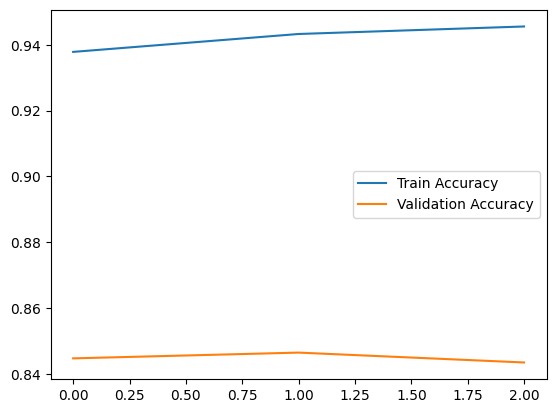

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.layers import LSTM

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x_train_padded, y_train,  # Use `X_train_tokenized` for transformers
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=2)]
)


Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7810 - loss: 0.4602 - val_accuracy: 0.8646 - val_loss: 0.3205
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9188 - loss: 0.2184 - val_accuracy: 0.8725 - val_loss: 0.3202
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9440 - loss: 0.1533 - val_accuracy: 0.8635 - val_loss: 0.3566
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9612 - loss: 0.1118 - val_accuracy: 0.8669 - val_loss: 0.4390


In [ ]:
loss, accuracy = model.evaluate(x_test_padded, y_test)  # Use `X_test_tokenized` for transformers
print(f"Test Accuracy: {accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8609 - loss: 0.4225
Test Accuracy: 0.86


In [ ]:
y_pred = model.predict(x_test_padded)
y_pred = (y_pred > 0.5).astype(int)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8344
Precision: 0.8210
Recall: 0.8585
F1 Score: 0.8393


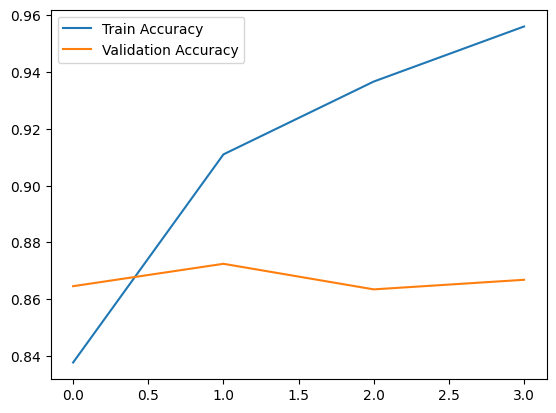

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),  # Word embedding layer
    GRU(64, return_sequences=True),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the model
history = model.fit(
    x_train_padded, y_train,  # Use `x_train_padded` for GRU model
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=2)]
)


Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7611 - loss: 0.4656 - val_accuracy: 0.8714 - val_loss: 0.3044
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9161 - loss: 0.2155 - val_accuracy: 0.8758 - val_loss: 0.3071
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9529 - loss: 0.1328 - val_accuracy: 0.8671 - val_loss: 0.3593


In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test_padded, y_test)  # Use `x_test_padded` for GRU model
print(f"Test Accuracy: {accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8636 - loss: 0.3556
Test Accuracy: 0.87


In [ ]:
# Predict on the test data
y_pred = model.predict(x_test_padded)
y_pred = (y_pred > 0.5).astype(int)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8682
Precision: 0.8489
Recall: 0.8984
F1 Score: 0.8729


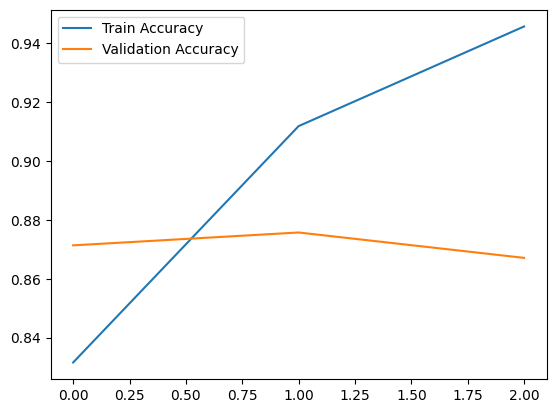

In [ ]:
# Plotting the training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()